<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday June 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import poisson
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [10 points] Problem 1 

**Part A**:  Your friend is teaching you how to bat in baseball by pitching balls to you as you try to hit them. Sadly, you are not very good. On any given pitch, the probability that you hit the ball is only about 0.05. Your friend needs to know when she'll be able to go home, so she wants to estimate the distribution of the number of balls she will need to throw by the time you get your 10th hit. Luckily, you are better at Data Science than you are at baseball!

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on.

Answer:

(i) A **negative binomial** distribution is needed to model this system. This is because we aim to model the number of trials necessary for a specific amount of "successes". In this case, a success is a hit.

(ii) Two parameters are necessary: the number of successes $r=10$ and the probability of a success $p=0.05$.

(iii) The random variable $X$ is the number of balls that must be thrown for 10 successful hits. $X$ can assume values from $[10, \infty)$.

**Part B:**  You are a data-driven transportation engineer investigating the effect that a new stoplight has on city traffic.  The stoplight is located in a high-traffic area, near a large commercial district in your city's downtown, so you want to estimate the distribution of number of cars per hour that pass through the intersection.  You conduct a field study by observing the stoplight all day on Monday and Tuesday one week, and determine that on average 80 cars pass under the stoplight per hour.

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on. Additionally, **(iv)** do you think it would be appropriate to use the data you collected and the distribution from parts **(i-iii)** to model the arrival of cars at this stoplight on a weekly timescale? Why or why not?

(i) A **poisson** distribution is required to model this system since it is concerned with a success _rate_.

(ii) A poisson distribution requires one parameter, $\lambda=80$, the rate that cars pass through the intersection per hour. 

(iii) The random variable $X$ represents the number of cars that pass through the intersection, which can theoretically be any number on $[0, \infty)$. 

(iv) I do not think that the collected data would be accurate to model the arrival of cars on a weekly timescale. First of all, by averaging the data over two days, the amount of traffic within the day is neglected. There is probably a large difference in traffic per hour at 5pm versus 3am. Second, the amount of traffic is probably far different on Monday and Tuesday than Friday, so they average data collected on Monday and Tuesday is likely not representative.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [15 points] Problem 2

In this problem you'll get some extra practice writing simple simulations. 

A young boy and an old woman are playing tic tac toe. Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The old woman plays first and randomly places an X in an open square. The boy plays next, and places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, each of the two players' probabilities of winning.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely do not be afraid to write helper functions that are called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an X or an O on an free square, or (iii) check if someone has won the game. Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [2]:
"""
Determine if the board has three in a row and return the player
that won if there is three in a row.
""" 
def is_winner(board):
    # There are 8 winning combinations
    
    # Handle the winning combinations that occur along a row.
    for row in range(0,3):
        if np.all(board[row,:] == board[row,0]) and board[row,0] != "":
            return not board[row][0] == "X"
    
    # Handle the winning combinations that occur along a column.
    for col in range(0,3):
        if np.all(board[:, col] == board[0, col]) and board[0, col] != "":
            return not board[0][col] == "X"
        
    # Handle the condition where there are 3 in a row diagonally.
    diag = np.array([board[0,0],board[1,1],board[2,2]], dtype="str")
    if np.all(diag[:] == diag[0]) and diag[0] != "":
            return not diag[0] == "X"

    # Handle the condition where there are 3 in a row off-diagonally.
    anti_diag = np.array([board[0,2],board[1,1],board[2,0]], dtype="str")
    if np.all(anti_diag[:] == anti_diag[0]) and anti_diag[0] != "":
            return not anti_diag[0] == "X"
    
    # Return -1 if the board is not in a winning configuration.
    return -1
    
    
"""
Run a single tic-tac-toe game and return the winner.
"""
def game():
    # Initialize an empty board.
    board = np.array([["","",""],["","",""],["","",""]], dtype="str")
    # List of unoccupied spaces.
    open_spaces = np.arange(0,9)
    # Index who's turn it is. Gram-Gram is player 0.
    whos_turn = 0
    
    # Iterate through the 9 possible turns
    for turn in range(0,9):
        
        """
        The block below places an X or an O on a free space.
        
        ----------------------------------------------------
        """
        
        # Character to place on the board changes depending on who's turn it is.
        character = 'X' if whos_turn==0 else 'O'
        
        # Get a random unoccupied space.
        spc_idx = rand.randint(0, len(open_spaces))
        idx = open_spaces[spc_idx]
        
        # Add the move to the unoccupied space on the board.
        board[idx // 3, idx % 3] = character
        
        # Remove the now occupied space from the list of places that are unoccupied.
        open_spaces = np.delete(open_spaces, spc_idx)
        
        """
        ----------------------------------------------------
        """
        
        # Check if there is a winner, return the winner if so.
        winner = is_winner(board)
        if winner != -1:
            return winner
        
        # Change turns.
        if whos_turn == 0:
            whos_turn = 1
        else:
            whos_turn = 0
    
    # Return if nobody has won by the end.
    return -1

"""
Bunch of tests. Not used in simulation, it just verifies that winning games
are detected properly.
"""
def tests():
    board = np.array([["","",""],["","",""],["","",""]], dtype="str")
    print(is_winner(board) == -1)
    board = np.array([["X","X","X"],["","",""],["","",""]], dtype="str")
    print(is_winner(board) == 0)
    board = np.array([["X","","X"],["","",""],["","",""]], dtype="str")
    print(is_winner(board) == -1)
    board = np.array([["O","O","O"],["","",""],["","",""]], dtype="str")
    print(is_winner(board) == 1)
    board = np.array([["","",""],["O","O","O"],["","",""]], dtype="str")
    print(is_winner(board) == 1)
    board = np.array([["","",""],["","",""],["O","O","O"]], dtype="str")
    print(is_winner(board) == 1)
    board = np.array([["X","",""],["X","",""],["X","",""]], dtype="str")
    print(is_winner(board) == 0)
    board = np.array([["X","",""],["","X",""],["","","X"]], dtype="str")
    print(is_winner(board) == 0)
    board = np.array([["","","X"],["","X",""],["X","",""]], dtype="str")
    print(is_winner(board) == 0)
    board = np.array([["","","O"],["","O",""],["O","",""]], dtype="str")
    print(is_winner(board) == 1)
    

"""
Perform the simulation.
"""
def simulate(ntrials=1000):
    # Store the winners
    results = np.zeros(ntrials)
    
    # Run ntrials number of games.
    for n in range(0, ntrials):
        results[n] = game()
    
    # Count the wins for each player and games without a winner.
    grammy_wins = np.count_nonzero(results == 0)
    little_boy_wins = np.count_nonzero(results == 1)
    no_wins = np.count_nonzero(results == -1)
    
    # Print results.
    print("Probability of Gram-Gram winning: {0:0.3f}".format(grammy_wins/ntrials))
    print("Probability of little boy winning: {0:0.3f}".format(little_boy_wins/ntrials))
    print("Probability of no winner: {0:0.3f}".format(no_wins/ntrials))
    

# Simulate 5000 times.
simulate(5000)

Probability of Gram-Gram winning: 0.585
Probability of little boy winning: 0.293
Probability of no winner: 0.123


The above code simulates 5,000 games of Tic-Tac-Toe and stores the winner of each game. One game is simulated with the `game()` function. It returns `0` if Gram-Gram wins and `1` if the little boy wins. On the other hand, if nobody wins a `-1` is returned. These outputs are stored in an array and then the amount of each result is counted.

There are some helper functions in my code too. `is_winner(board)` checks if a board is in a winning configuration, and if so, which player is in the winning configuration. `tests()` is merely a debugging tool to verify that winning/not winning configurations are detected properly.

From the simulation results, it appears that the probability of Gram-Gram (player 1) winning is about 0.580. Meanwhile, the probability of the little boy (player 2) winning is about 0.290. The remaining 13% of games (probability of 0.130) have no winner.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [20 points] Problem 3


<img src="http://uploads.neatorama.com/images/posts/870/98/98870/1508255088-0.jpg" style="width: 260px;"/>

Suppose you are baking pies and want to model the probability with which each pie you bake is delicious.  Let $X$ be a random variable representing the **Deliciousness Index (DI)** of a pie, on a scale of $0$ (least delicious) to $\pi$ (a most excellent pie).  The probability density function for $X$ is:

$$
f(x) = \begin{cases}
         c\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

To be a valid density function, $f(x)$ must integrate to 1. Therefore, we seek $c$ such that

$$
\begin{align*}
    1 &= \int_{0}^{\pi} c\,(\cos(x) + 1) \, dx \\
      &= c \left[ \int_{0}^{\pi} \cos(x) \, dx + \int_{0}^{\pi} dx \right] \\
      &= c \left[ 0 + \pi \right] \\
    \implies c &= \frac{1}{\pi}
\end{align*}
$$

Therefore, $f(x)$ is 

$$
f(x) = \begin{cases}
         \frac{1}{\pi} \left( \cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                                        & \text{otherwise}
       \end{cases}
$$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  What should $F(\pi)$ equal?  Be sure to **justify** this answer. Then, verify this answer by calculating $F(\pi)$ from the cdf you derive.

The cumulative distribution function is simply the antiderivative of the probability density function (PDF) over the whole sample space. So, we integrate $f(x)$ to obtain $F(x)$ like so

$$
F(x) = \int \frac{1}{\pi} \left( \cos(x) + 1 \right) \, dx = \frac{1}{\pi} \left( \sin(x) + x \right) + C
$$

We then choose $C=0$ to satisfy the condition that $F(\pi)$ must be 1: $F(\pi) = \frac{1}{\pi} \left( \sin(\pi) + \pi \right) = \frac{1}{\pi} \left( \pi \right) = 1$. This must be the case because the total probability --- the area under the PDF that is given by the CDF --- must be 1 at the upper limit of the function, which is $\pi$ in this case.

**Part C**: It is a well-known fact that pies with Deliciousness Index at least 2 are classified as **Quite Tasty**. Use the cdf you computed in **Part B** to find the probability that a single pie you bake is Quite Tasty. 

We wish to evaluate $F(\pi) - F(x) = 1 - F(x) = 1 - \frac{1}{\pi} \left( \sin(x) + x \right)$, the differnce between the maximum of the CDF at $x=\pi$ and the values of the CDF at $x=2$. 

$$
1 - F(2) = 1- \frac{1}{\pi} \left( \sin(2) + 2 \right) \approx 0.074
$$

So, only about 7.4% of pies are **Quite Tasty**.

**Part D**: What is the expected Deliciousness Index of any given pie you bake?  Calculate this by hand, using techniques you may or may not need to dust off from Calculus 2. Once you have a final analytic solution (in terms of $\pi$), *then* you should obtain and report an approximate decimal answer.

We seek the expected value of the continuous random variable $x$ representing the deliciousness index. So, the expectation value $E[x]$ is given by 

$$
E[x] = \int_{-\infty}^{\infty} x \, f(x) \, dx
$$

Now we substitute in the $f(t)$, the PDF, into the above equation and solve

$$
\begin{align*}
    E[x] &= \int_{-\infty}^{\infty} x \, \frac{1}{\pi} \left( \cos(x) + 1 \right) \, dx \\
         &= \frac{1}{\pi} \int_{0}^{\pi} x \, \left( \cos(x) + 1 \right) \, dx \tag{moving constant and simplifying bounds} \\
         &= \frac{1}{\pi} \left[ \int_{0}^{\pi} x\, \cos(x) \, dx  + \int_{0}^{\pi} x \, dx \right] 
\end{align*}
$$

The integral on the right must be solved using integration by parts.

$$
\begin{align*}
         \int_{0}^{\pi} x\, \cos(x) \, dx &= x \, \sin(x) \, \Big|_{0}^{\pi} - \int_{0}^{\pi} \sin(x) \, dx \\
                                          &= \cos(x) \, \Big|_{0}^{\pi} \\
                                          &= -2
\end{align*}
$$

The integral on the right is just a standard integration.

$$
\begin{align*}
         \int_{0}^{\pi} x \, dx &= \frac{1}{2} x^2 \Big|_{0}^{\pi} \\
                                  &= \frac{1}{2} \pi^2
\end{align*}
$$

So, combining the results, we get:

$$
\begin{align*}
         \frac{1}{\pi} \left[ \int_{0}^{\pi} x\, \sin(x) \, dx  + \int_{0}^{\pi} x^2 \, dx \right] &= \frac{1}{\pi} \left[-2 + \frac{1}{2} \pi^2 \right] \\
         &= -\frac{2}{\pi} + \frac{1}{2} \pi \\
         &\approx 0.9342
\end{align*}
$$

So, the expected deliciousness index of the pies is $\frac{\pi}{2} - \frac{2}{\pi}$. Numerically, this is about 0.9342.

**Part E:**  The symmetric version of our probability density function is $g(x) = c(\cos{(x)}+1), -\pi \leq x \leq \pi$.  $g(x)$ sometimes referred to as the "raised cosine" probability density function. It is often useful as an alternative to a normal distribution.

Name one key difference between the raised cosine and a normal distribution centered at $x=0$.  Describe a situation that would be appropriate to model using one of those probability density functions, but not the other.

The key difference between the two distributions is that the raised cosine distribution actually assumes a value of 0 at $x = \pi$ and $x = -\pi$. The normal distribution, on the other hand, asymptotically approaches 0 as $x$ goes to positive or negative infinity.

In a case where the tails of the distribution are of interest, it would be appropriate to use a normal distribution but not a raised cosine. This is because the raised cosine would underestimate the cumulative probability because the PDF goes to zero, while the normal distribution would not. 

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [20 points] Problem 4

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. So, for example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledger) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ ($0 \leq x \leq 9$) and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [3]:
import math

"""
Implements the leading digit PMF
"""
def pmf_natural(x):
    # Input so sanitary they call it Purell
    assert x > 0, "x must be greater than 0."
    assert type(x) is int, "x must be an integer."
    assert x <= 9, "x must be less than or equal to 9."
    
    # PMF expression
    return math.log10((x+1)/x)

This PMF is well defined because it assigns exactly one output value $f(x)$ to every input value $x$. In terms of the above code, passing in a scalar `x` value returns exactly one output.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

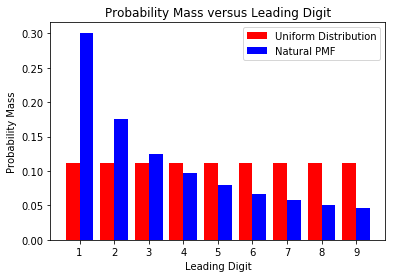

In [4]:
fig, ax = plt.subplots()

# Lower bound
a = 1

# Upper bound + 1
b = 10

# Bar width (formatting)
w = 0.4

# X values
x = np.arange(a,b)

# Calculate the distributions
u_x = np.array([1/(b-a) for y in range(a,b)])
p_x = np.array([pmf_natural(y) for y in range(a,b)])

# Draw the plots and format them
ax.bar(x-w/2,u_x,width=w,color='r',align='center')
ax.bar(x+w/2,p_x,width=w,color='b',align='center')

ax.set_title("Probability Mass versus Leading Digit")
ax.set_xlabel("Leading Digit")
ax.set_ylabel("Probability Mass")

ax.set_xticks(range(a,b))

ax.legend(["Uniform Distribution", "Natural PMF"])

plt.show()

The plot above shows the probability mass of each digit for two different distributions. In red is a uniform distribution where each bar has a mass of $1/9$. In blue is the given "natural" PMF.

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(x)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 2 and at most 3.

What interesting fact do your results tell you about the relative frequencies of low versus high leading digits, that occur naturally?

In [5]:
"""
Implements the leading digit CDF by summing the values of the PDF up to x.
"""
def cdf_natural(x):
    # Antibiotics
    assert x > 0, "x must be greater than 0."
    assert type(x) is int, "x must be an integer."
    assert x <= 9, "x must be less than or equal to 9."
    
    # Sum using list comprehension.
    return sum([pmf_natural(y) for y in range(1,x+1)])

The probability that the leading digit is at most 2 is given by $F(2)$ and the probability that the leading digit is at most 3 is given by $F(3)$.

In [6]:
print(cdf_natural(2))
print(cdf_natural(3))

0.47712125471966244
0.6020599913279624


Based on the above, $P(X \leq 2) = F(2) \approx 0.4771$ and $P(X \leq 3) = F(3) \approx 0.6021$. 

It can also be noted that the relative frequencies of the low digits is significantly higher than the larger digits. The probability of the leading digit being less than or equal to is greater than 50%!

**Part D**: The data in [tax_data.txt](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jigc0s4atj24lr) contains the taxable income for individuals in 1978 (available linked here, and on Piazza). Use Pandas and the information from this problem to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words.

In [7]:
# Load the data
df = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jigc0s4atj24lr", delim_whitespace=True)
df.head(3)

,taxIncomes
1,5601.0
2,4977.0
3,5959.0


In [8]:
# First, create a row of the data frame that stores the leading digit.
df["leading"] = [int(str(df.iloc[x][0])[:1]) for x in range(0, len(df.index))]

# Remove zeros from the data.
df = df[df["leading"] != 0]

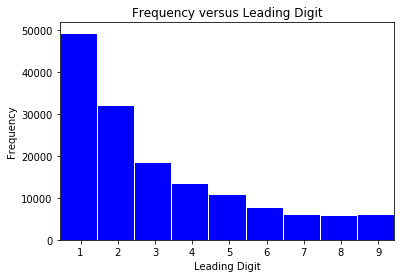

In [9]:
# Next, plot as a histogram

# Lower Bound
a = 1

# Upper Bound
b = 10

# Plot
ax = df.hist(column="leading",bins=9,grid='off',color='b',edgecolor='w',align='mid')[0][0]

# FoRMaTtiNg iN PaNDaS is EaSY anD fUn tHeY SAiD
ax.set_title("Frequency versus Leading Digit")
ax.set_xticks(np.arange(a+0.5,b-0.5,step=(b-2)/(b-1))) # why tho, are centered labels too much to ask??
ax.set_xticklabels(["{}".format(x) for x in range(a,b)])
ax.set_xlim(a,b-1)
ax.set_xlabel("Leading Digit")
ax.set_ylabel("Frequency");

In [10]:
total_entries = len(df.index)
frequency_at_most_2 = len(df[df["leading"] <= 2].index)/total_entries
frequency_at_most_3 = len(df[df["leading"] <= 3].index)/total_entries
print(frequency_at_most_2)
print(frequency_at_most_3)

0.5419607322897321
0.6655279915096842


Conclusion:

The plot above has a strong similarity to the PMF for naturally distributed data which is evidence that this data is not fraudulent. To confirm this theory, however, the cumulative distribution of of the different leading digits was also calculated. These results are shown below the plot. It was found that $P(X \leq 2) \approx 0.5420$ and $P(X \leq 3) \approx 0.6655$. These cumulative probabilities are very similar to the same values in the model for the natural distribution.

Because of these two results from analysis of the data, it is reasonable to conclude that this data is *not fraudulent*.

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
### [35 points] Problem 5

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

<img src="http://www.panoston.com/wp-content/uploads/2017/08/store-line-1.jpg" style="width: 300px;"/>

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You stand at the front of the store watching the two lines and tabulating the inter-arrival times for each line and find the following:
* John's line checks-out an average of 2 customers per five-minute time slice,
* the self check-out machine checks-out an average of 2.5 customers per five-minute time slice **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per five-minute time slice if the machine is freezing up, and
* the self check-out machine froze up for 2 of the 10 five-minute time slices you observed it.

Answer the following questions about this scenario. **Note** that for **Parts B-C** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in-fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 5-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

The number of customers should be Poisson distributed since a Poisson distribution describes a number of "hits" assuming an average hit rate per unit time. A Poisson distribution requires only one parameter, $\lambda$, the average hit rate. 

John Henry's checkout line has a average hit rate of $\lambda = 2$. The working self-checkout has an average hit rate of $\lambda = 2.5$, but only $\lambda = 2.5$ when it is broken.

**Part B**:  What is the probability that 3 customers pass through John's line in the next 5 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

In [14]:
print(poisson.pmf(3, mu=2))
print(poisson.pmf(3, mu=2.5))
print(poisson.pmf(3, mu=1))

0.180447044315
0.21376301725
0.0613132401952


If $X$ is the random variable describing the number of customers that are checked-out, the probability that 3 customers pass through John's line in the next five minutes is given by $P(X = 3) = \frac{\lambda^3 e^{-\lambda}}{3!} = \frac{2^3 e^{-2}}{3!} \approx 0.1804$. 

The probability that 3 customers pass through the working self-checkout line in the next five minutes is given by $P(X = 3) = \frac{\lambda^3 e^{-\lambda}}{3!} = \frac{2.5^3 e^{-2.5}}{3!} \approx 0.2138$. 

The probability that 3 customers pass through the broken self-checkout line in the next five minutes is given by $P(X = 3) = \frac{\lambda^3 e^{-\lambda}}{3!} = \frac{1^3 e^{-1}}{3!} \approx 0.0613$. 

All of these values are given by the distribution $Pois(\lambda)$ for the corresponding lambda value.

**Part C**:  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out serves 3 customers is the next 5 minutes.

In [15]:
p_w = 0.8
p_b = 0.2

p_sw = poisson.pmf(3, mu=2.5)
p_sb = poisson.pmf(3, mu=1)

print(p_sw*p_w + p_sb*p_b)

0.183273061839


The Law of Total Probability states that $P(S) = P(S \, | \, W)\,P(W) + P(S \, | \, B)\,P(B)$ where $S$ is the event that three customers are served, $W$ is the event that the machine is working,  and $B$ is the event that the machine is broken.

From the problem statement, we know $P(W)=0.8$ and $P(B)=0.2$. The probabilities from the Poisson distributions in Part B give $P(S \, | \, W)\approx0.2138$ and $P(S \, | \, B)\approx0.0613$.

Therefore, after substituting in the known values into the Law of Total Probability, we find that the probability of the self-checkout serving 3 customers in the next five minutes to be $P(S) \approx 0.1833$. 

**Part D**:  S'pose John is working a 4-hour shift from 4-8 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  Be sure to justify any assumptions or extrapolations that you make.

In [38]:
print(1 - poisson.cdf(99, mu=96))

0.354943582424


The four-hour shift consists of 48 five-minute blocks, so $\lambda$ scales up from 2 customers/five-minute block up to 96 customers/four-hour block. This is assuming that John maintains the same average checkout rate throughout the duration of his shift. That is, the probability of checking out a certain number of customers is directly proportional to the amount of time that customers are observed. The other assumption is that each checkout is an independent event and does not affect subsequent checkouts. 

With these assumptions in mind, we now seek $P(X \geq 100)=1-\sum_{k=1}^{99} \frac{\lambda^k e^{-\lambda}}{k!}=1-\sum_{k=1}^{99} \frac{96^k e^{-96}}{k!}$, which is the total probability minus the CDF of the Poisson distribution up to and including 99 customers served. This evaluates to about 0.3549, or about a 35.5% chance of John checking out 100 customers.

**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 4-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 4-hour shift, and report your result.

Here, your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 4-hour shift. Use at least 5000 simulations.

Finally, use **this same function**, with clever input, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [73]:
"""
Get the time until to the next arrival. 

THIS USES BETAS NOT LAMBDAS
"""
def get_time(work_rate_b, broke_rate_b, p_work):
    # Choose a random value on [0,1). If less than p_work, the probability
    # the self-checkout is working, then sample from the working distro.
    w = rand.random() < p_work
    
    
    if w: # sample working distro
        return rand.exponential(work_rate_b)
    else: # sample broken distro
        return rand.exponential(broke_rate_b)

"""
Simulate a checkout line and report the number of customers served in the timeframe.
The rates provided should be scaled to be over the entire timeframe.
"""
def checkout_count(work_rate_b, broke_rate_b, p_work):
    # Customers served.
    customers = 0

    # Progress towards end of shift from 0 (start) to 1 (end).
    time = get_time(work_rate_b, broke_rate_b, p_work)

    # While the shift has not ended, serve a customer and update time.
    while time < 1:
        customers += 1
        time += get_time(work_rate_b, broke_rate_b, p_work)

    # Return the customers served
    return customers
    

"""
Simulate a checkout line and report the fraction of simulations which serve the
given amount of customers in the timeframe. The rates provided should be scaled to
be over the entire timeframe.
"""
def sim(work_rate, broke_rate, p_work, served=100, n_sims=5000):
    # Store here
    customers_served = np.zeros(n_sims)
    
    # Get the inverses for drawing from the distro and do division beforehand
    # because perflab.
    work_rate_b = 1/work_rate
    broke_rate_b = 1/broke_rate
    
    # Simulate
    for sim in range(0,n_sims):
        customers_served[sim] = checkout_count(work_rate_b, broke_rate_b, p_work)
    
    # Print the output.
    print("Average customers served: {}".format(customers_served.mean()))
    print(((customers_served >= served).sum())/n_sims) 

    
# Print self-checkout results
sim(2.5*48, 1*48, 0.8, served=100, n_sims=5000)
# Print John's results
sim(2*48, 2*48, 1, served=100, n_sims=5000)

Average customers served: 92.7374
0.2826
Average customers served: 95.9066
0.3464


This simulation works by storing "shift progress" as a float. Time to serve a customer is added to shift progress by sampling from an exponential distribution. Each time this updates, a served customer is counted and progress updated until the shift is over. The number of served customers is then returned. These values are saved and the fraction of simulations which served greater than the desired number of customers reported.

We see from the results that the probability that the self-checkout will serve 100 customers during the shift is about 0.27 while the John will serve 100 customers with a probability of about 0.36 in that time, verifying Part D.

**Part F:**  
1. What are the mean numbers of customers served by each of John and the self check-out machine during the 4-hour shift?
2. Which is better for the grocery store in the short-term, the self check-out machine technology, or folks like John Henry?  Justify your answer with some figures or calculations that you feel will be appropriate, or shout-outs to results you have already calculated.
3. What if they improve the self check-out machine to only fail 10% of the time?

On average, John will serve about 96 customers while the self-checkout will serve only about 93 (see output from Part E). Based on this fact and on the probability of serving 100 customers or more during his shift, John is better for the store in the short term. John serves more customers on average (96 > 92) and has a greater probability of serving more than 100 customers on his shift (0.36 > 0.27). The self-checkout just fails too often.

In [74]:
sim(2.5*48, 1*48, 0.9, served=100, n_sims=5000)

Average customers served: 104.5474
0.666


If the self checkout failed only 10% of the time, it would be far better! As shown above, with a 90% working rate and a 10% failing rate, the self checkout would serve around 105 customers every four hours and serve 100 or more customers 66% of the time.